# Coursework: Climate data analysis

In [1]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from sklearn.metrics import mean_squared_error, mean_absolute_error

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [2]:
################################### 
# i.How many cities are there in the dataset?
data = pd.read_pickle(r'./weather-denmark-resampled.pkl')
data.columns
#5 cities 
###################################

MultiIndex([( 'Aalborg',      'Temp'),
            ( 'Aalborg',  'Pressure'),
            ( 'Aalborg', 'WindSpeed'),
            ( 'Aalborg',   'WindDir'),
            (  'Aarhus',      'Temp'),
            (  'Aarhus',  'Pressure'),
            (  'Aarhus', 'WindSpeed'),
            (  'Aarhus',   'WindDir'),
            ( 'Esbjerg',      'Temp'),
            ( 'Esbjerg',  'Pressure'),
            ( 'Esbjerg', 'WindSpeed'),
            ( 'Esbjerg',   'WindDir'),
            (  'Odense',      'Temp'),
            (  'Odense',  'Pressure'),
            (  'Odense', 'WindSpeed'),
            (  'Odense',   'WindDir'),
            ('Roskilde',      'Temp'),
            ('Roskilde',  'Pressure'),
            ('Roskilde', 'WindSpeed'),
            ('Roskilde',   'WindDir')],
           )

In [3]:
###############################
# ii.How many observations and features are there in this dataset?
len(data.columns)
features = len(data.columns)/5
row = data.count(axis='columns')
#333110 observations and 4 features
###############################

In [4]:
###############################
# iii.What are the names of the different features?
result = []
a = range(len(data.columns))
for i in a:
    if data.columns[i][1] in result:
        result
    else:
        result.append(data.columns[i][1])
result
###############################

['Temp', 'Pressure', 'WindSpeed', 'WindDir']

**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [5]:
###########################

pd.notnull(data)
data_noNull = data.dropna(axis = 0)
data_noNull.
###########################

SyntaxError: invalid syntax (<ipython-input-5-9276f3f61afa>, line 5)

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [6]:
###########################
minimum = np.amin(data_noNull)
maximum = np.amax(data_noNull)
median = np.median(data_noNull, axis=0)
mean = np.mean(data_noNull)
std = np.std(data_noNull)
a = [minimum,maximum,median,mean,std]
for i in a:
    print(i)
#Anomlies
#1. Max windspeed of odesnse which hits 62.521795, while the mean of windspeed in other regions excluding odesnse is 32.6 which
#means that odesnse is off by almost 100%
#2. Max temperature of Esbjerg and odesnse which hits 54 and 49.9 respectively.
#3. Mean of windspeed in Aarhus which records 4.033814 while the other regions are above 4.8 (average 4.858 excluding Aarhus).
#The means that it is off by more than 20%.
###########################

NameError: name 'data_noNull' is not defined

## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*


**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [34]:
#################################
data = pd.read_pickle(r'./df_perth.pkl')
data

#################################

,temp,pressure,relative humidity,wind speed,cloud cover,precipitation,PV production,"diffuse radiation, tilt",solar azimuth
DateTime,,,,,,,,,
2005-01-01 00:00:00,24.7,1015,68,3.3,0,0.0,0,0,-2.5
2005-01-01 01:00:00,23.7,1015,73,2.8,0,0.0,0,0,-19.1
2005-01-01 02:00:00,23.1,1015,70,3.3,0,0.0,0,0,-33.4
2005-01-01 03:00:00,22.5,1015,76,3.6,0,0.0,0,0,-45.5
2005-01-01 04:00:00,22.0,1015,75,2.6,0,0.0,0,0,-55.4
...,...,...,...,...,...,...,...,...,...
2005-12-31 19:00:00,23.7,1013,47,6.9,1,0.0,1,1,61.1
2005-12-31 20:00:00,21.1,1013,61,6.0,1,0.0,0,0,52.2
2005-12-31 21:00:00,18.5,1013,75,4.2,1,0.0,0,0,41.4


**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

                             temp  pressure  relative humidity  wind speed  \
temp                     1.000000 -0.000713          -0.761345    0.343214   
pressure                -0.000713  1.000000          -0.253514    0.007968   
relative humidity       -0.761345 -0.253514           1.000000   -0.340895   
wind speed               0.343214  0.007968          -0.340895    1.000000   
cloud cover             -0.090391 -0.782275           0.272694   -0.060845   
precipitation           -0.062609 -0.245895           0.175913   -0.011236   
PV production            0.529136  0.162544          -0.646227    0.249162   
diffuse radiation, tilt  0.440259 -0.216266          -0.459441    0.194775   
solar azimuth            0.360599 -0.001735          -0.428187    0.269784   

                         cloud cover  precipitation  PV production  \
temp                       -0.090391      -0.062609       0.529136   
pressure                   -0.782275      -0.245895       0.162544   
relative 

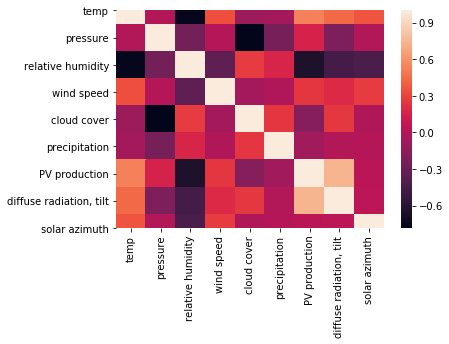

In [35]:
#################################
#plt.matshow(data.corr())
#plt.show()
import seaborn as sns
corr = data.corr(method='pearson')
print(corr)
sns.heatmap(corr, xticklabels= corr.columns, yticklabels = corr.columns)
#################################

**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

In [89]:
#################################
df['heavy rain'] = [0 if x < 1 else 1 for x in df['precipitation']]
new_df = df.drop(['temp', 'pressure', 'relative humidity', 'wind speed',
       'precipitation', 'PV production', 'diffuse radiation, tilt',
       'solar azimuth'], axis=1)
corr = new_df.corr()
print(corr)

sns.heatmap(corr, xticklabels= corr.columns, yticklabels = corr.columns)

new_df.plot(kind='scatter',x='cloud cover',y='heavy rain',color='blue')
plt.show()
#################################

KeyError: 'precipitation'

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

In [70]:
#################################
#Correlations are patterns in the data, which makes it possible to use the value of one variable to predict another variable.
#Hence, if we want to predeict the photovoltaic production (PV production), we need to find features which are highly correlated
#to PV production. Hence, we looked at the heatmap and found that the features, 'diffuse radiation, tilt' is the most
#postitively correlated with the value over 0.6 and 'temp' is the second highest postive correlated (around 0.4). 
#Furthermore, 'relative humidity' is the highest negatively correlated to PV production with a correlation value more than -0.6. Therefore, the two features
#It suggests that PV production is highly dependent to these features,hence the two features,'diffuse radiation, tilt' and 
#'relative humidity' are statistically significant to be used for predicting the PV production using linear regression.



#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

[ 1.22683789 -4.82227905 -1.30150193  1.00889558]
407.91303995153
                            OLS Regression Results                            
Dep. Variable:          PV production   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     4446.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        05:33:08   Log-Likelihood:                -54924.
No. Observations:                8760   AIC:                         1.099e+05
Df Residuals:                    8755   BIC:                         1.099e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\edwardkim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


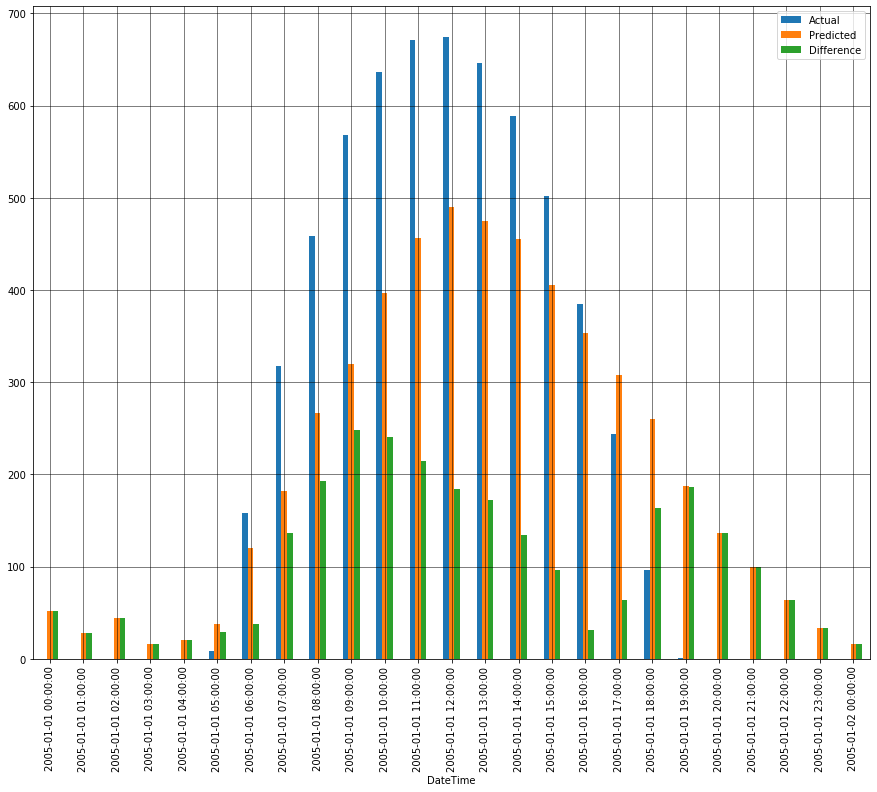

In [88]:
#################################
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

data_x = data[['diffuse radiation, tilt', 'relative humidity','temp','wind speed']] #'diffuse radiation, tilt', 'relative humidity',
data_y = data['PV production']

#data_x, data_x2, data_y, data_y2 = train_test_split(data_x,data_y)
regr = linear_model.LinearRegression()
regr.fit(data_x,data_y)
pv_pred= regr.predict(data_x)
print(regr.coef_)
print(regr.intercept_)

X = sm.add_constant(data_x) # adding a constant
model = sm.OLS(data_y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

df = pd.DataFrame({'Actual': data_y, 'Predicted': pv_pred, 'Difference': abs(pv_pred - data_y)})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#################################